### Overview

In this project I aim to find a way to predict if a person has Diabetes. The task is straight forward find the best correlations, then create comparison between Prediction and having Diabetes. by that I will test the correlation of a person by age and BMI, then I will move in with the rest of the data and see any commen relations to Diabetes. my personal Goal here is create some analytical thinking.

###### Dataset collected from: https://www.kaggle.com/pritsheta/diabetes-dataset/tasks

- Attributes
    - 'Pregnancies', 
    - 'Glucose', 
    - 'BloodPressure', 
    - 'SkinThickness', 
    - 'Insulin',
    - 'BMI', 
    - 'DiabetesPedigreeFunction', 
    - 'Age', 
    - 'Outcome'

######  Research source: https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

I have no medical back ground so I dug deep into the medical research about Diabetes and I found there are two types I and II. Type I symptoms tend to come on quickly and be more severe. where as Type II:

- Symptoms
    - Increased thirst
    - Frequent urination
    - Extreme hunger
    - Unexplained weight loss
    - Presence of ketones in the urine (ketones are a byproduct of the breakdown of muscle and fat that happens when there's not enough available insulin)
    - Fatigue
    - Irritability
    - Blurred vision
    - Slow-healing sores
    - Frequent infections, such as gums or skin infections and vaginal infections

With more reading I found out that *insulin and glucose* are main factor of cause of type 2 diabetes. Risk factors for prediabetes and type 2 diabetes are: 

- Causes
    - 'Age', 
    - 'Weight', 
    - 'Inactivity', 
    - 'Family history', 
    - 'bnormal cholesterol and triglyceride levels',
    - 'ethnicity' 

As I know from *NASM School*, I learned that the cause of Diabetes is high BMI, Blood pressure, weight and age are factors of diabetes.
Therefore, I know the the outcome here is diabetes type II. Clearly, Pregnancies are unrelated but based on the given data I must find related informations.

- Reference:<br>
    1. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    2. https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d

In [239]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
from matplotlib.colors import ListedColormap


In [106]:
data = pd.read_csv(r'D:\PortfolioProjects\Diabetes\Diabetes.csv')

print(data.columns)

data.nunique()

data.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
## no null Values now check. It will be hard to check for duplicates since the patients do not have codes.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [223]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
## Clearly outcome with 1 means have diabetes but with 0 means no Diabetes

data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


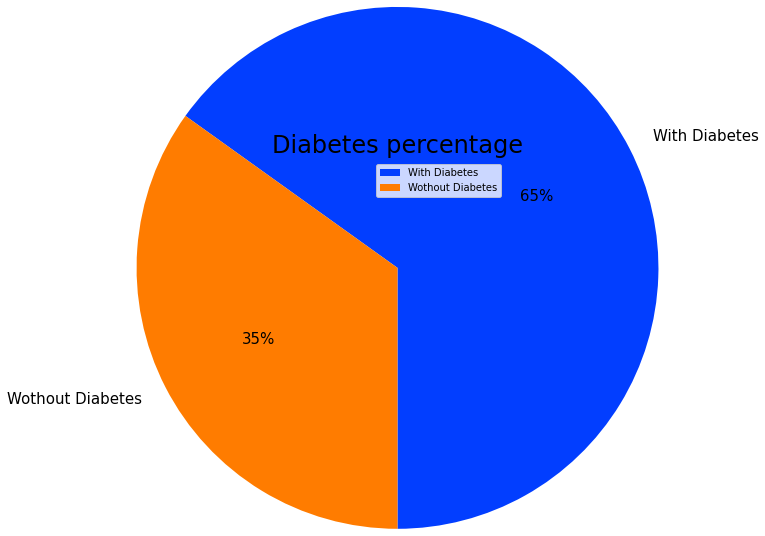

In [48]:
Test_results = data.Outcome.value_counts()
print(Test_results)

x = data.Outcome.value_counts(0)
y = data.Outcome.value_counts(1)

colors = sns.color_palette('bright')[0:5]
Labels = ('With Diabetes','Wothout Diabetes')
textprops = {"fontsize":15}

plt.pie(Test_results, labels = Labels, colors = colors, radius = 3, startangle = 270, textprops=textprops, autopct='%.0f%%')
plt.title('Diabetes percentage', size = 24)
plt.legend()
plt.show()

            Age  Outcome  Count
0  (20.0, 30.0]        0    327
1  (20.0, 30.0]        1     90
2  (30.0, 40.0]        0     81
3  (30.0, 40.0]        1     76
4   (40.0, inf]        0     92
5   (40.0, inf]        1    102


Text(0, 0.5, 'Diabetes')

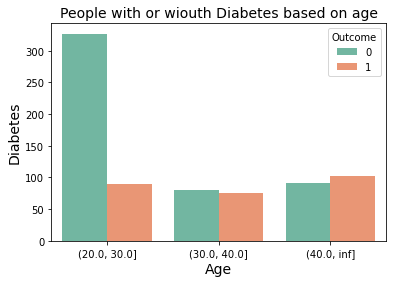

In [118]:
## I will test people based on their age between 40 and above, and younger than 40
## Number of diagnosed with or without heart disease age range

agerange = pd.cut(data['Age'], bins = [20, 30, 40, np.inf])

ages = data.groupby([agerange, 'Outcome']).size().reset_index(name = 'Count')
print(ages)

ax2 = sns.barplot(x = "Age", y = "Count", data = ages, hue = 'Outcome', palette = 'Set2')
ax2.set_title('People with or wiouth Diabetes based on age',fontsize = 14)
ax2.set_xlabel('Age', fontsize = 14) 
ax2.set_ylabel('Diabetes', fontsize = 14)



[Text(0, 0, '(0.0, 1.0]'),
 Text(1, 0, '(1.0, 2.0]'),
 Text(2, 0, '(2.0, 4.0]'),
 Text(3, 0, '(4.0, 6.0]'),
 Text(4, 0, '(6.0, 8.0]'),
 Text(5, 0, '(8.0, 10.0]'),
 Text(6, 0, '(10.0, inf]')]

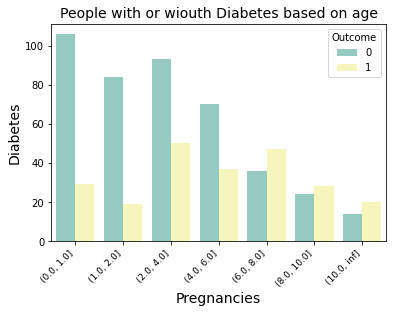

In [127]:
rangesP = pd.cut(data['Pregnancies'], bins = [0, 1, 2, 4, 6, 8, 10, np.inf])

Pregn = data.groupby([rangesP, 'Outcome']).size().reset_index(name = 'Count')


ax2 = sns.barplot(x = "Pregnancies", y = "Count", data = Pregn, hue = 'Outcome', palette = 'Set3')
ax2.set_title('People with or wiouth Diabetes based on Pregnancies',fontsize = 14)
ax2.set_xlabel('Pregnancies', fontsize = 14) 
ax2.set_ylabel('Diabetes', fontsize = 14)

ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=9, rotation = 45, ha = "right")

[Text(0, 0, '(0.0, 60.0]'),
 Text(1, 0, '(60.0, 80.0]'),
 Text(2, 0, '(80.0, 100.0]'),
 Text(3, 0, '(100.0, 120.0]'),
 Text(4, 0, '(120.0, 150.0]'),
 Text(5, 0, '(150.0, 180.0]'),
 Text(6, 0, '(180.0, inf]')]

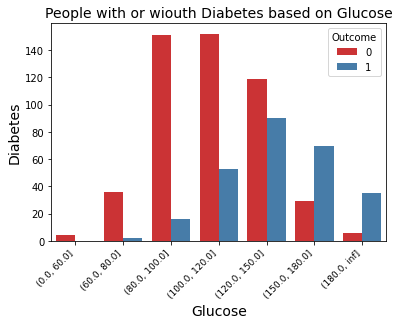

In [138]:
rangesP = pd.cut(data['Glucose'], bins = [0, 60, 80, 100, 120, 150, 180, np.inf])

Pregn = data.groupby([rangesP, 'Outcome']).size().reset_index(name = 'Count')


ax2 = sns.barplot(x = "Glucose", y = "Count", data = Pregn, hue = 'Outcome', palette = 'Set1')
ax2.set_title('People with or wiouth Diabetes based on Glucose',fontsize = 14)
ax2.set_xlabel('Glucose', fontsize = 14) 
ax2.set_ylabel('Diabetes', fontsize = 14)

ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=9, rotation = 45, ha = "right")

[Text(0, 0, '(15.0, 20.0]'),
 Text(1, 0, '(20.0, 25.0]'),
 Text(2, 0, '(25.0, 30.0]'),
 Text(3, 0, '(30.0, 35.0]'),
 Text(4, 0, '(35.0, 40.0]'),
 Text(5, 0, '(40.0, 45.0]'),
 Text(6, 0, '(45.0, inf]')]

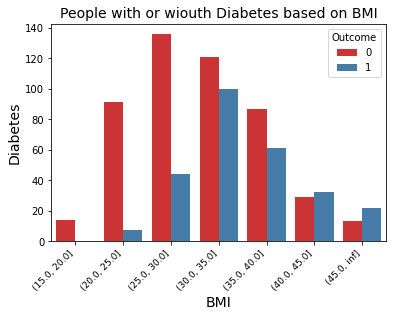

In [142]:
rangesP = pd.cut(data['BMI'], bins = [15, 20, 25, 30, 35, 40, 45, np.inf])

Pregn = data.groupby([rangesP, 'Outcome']).size().reset_index(name = 'Count')


ax2 = sns.barplot(x = "BMI", y = "Count", data = Pregn, hue = 'Outcome', palette = 'Set1')
ax2.set_title('People with or wiouth Diabetes based on BMI',fontsize = 14)
ax2.set_xlabel('BMI', fontsize = 14) 
ax2.set_ylabel('Diabetes', fontsize = 14)

ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=9, rotation = 45, ha = "right")

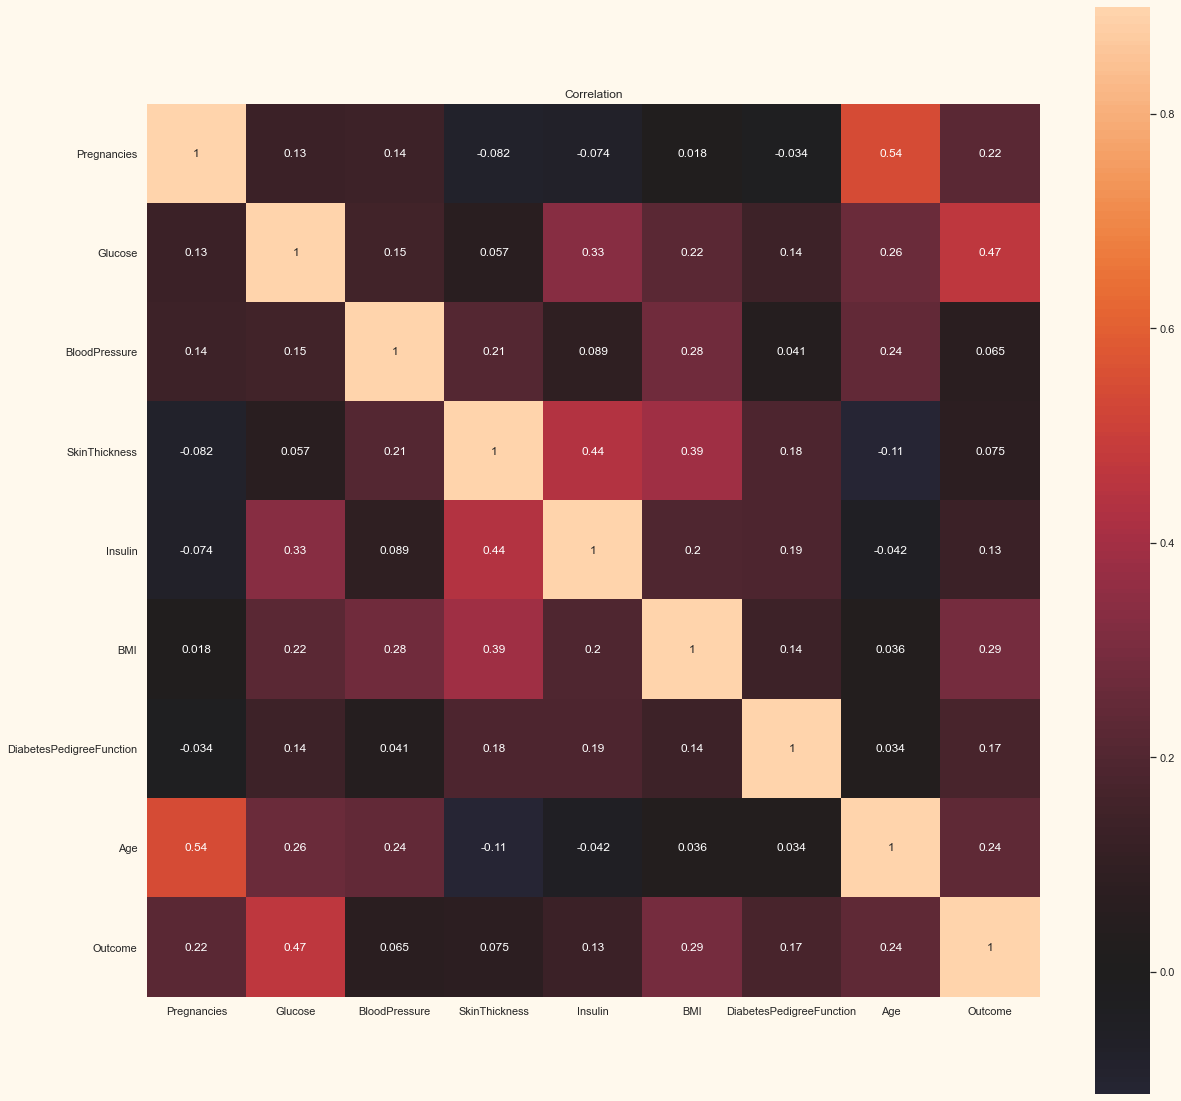

In [208]:
#heatmap correlation
plt.figure(figsize=(20,20))  

sns.heatmap(data.corr(), annot=True, vmax = 0.9, center=0, square = True)

plt.title("Correlation")
plt.show()

<Figure size 432x288 with 0 Axes>

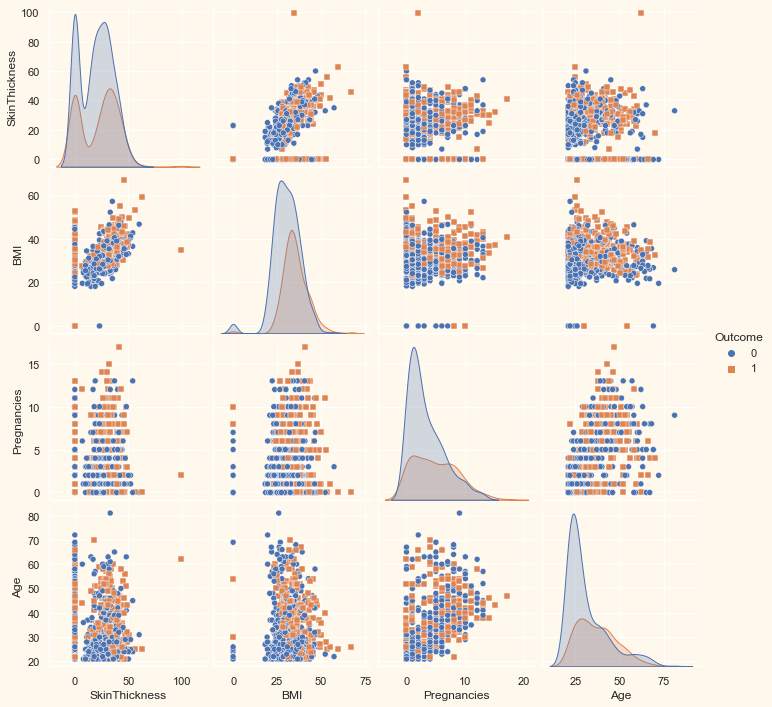

<Figure size 432x288 with 0 Axes>

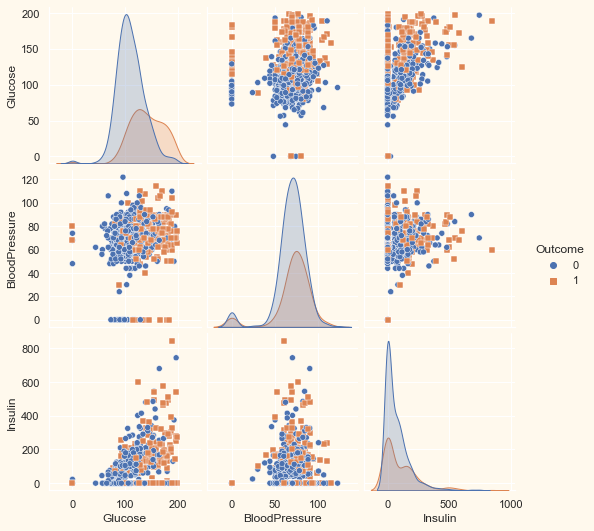

In [221]:
To_Plot = ["SkinThickness", "BMI", "Pregnancies", "Age", "Glucose", "BloodPressure", "Insulin", "Outcome"]
dataset_copy = pd.DataFrame(data[To_Plot])

# Plot the first 3 columns
plt.figure()
cols_to_plot = dataset_copy.columns[:4].tolist() + ['Outcome'] # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(dataset_copy[cols_to_plot], hue ="Outcome", markers=["o", "s"])
plt.show()

# Plot the remain columns
plt.figure()
cols_to_plot = dataset_copy.columns[4:].tolist() # Take the remaining columns for the second plot; those already include "Outcome"
sns.pairplot(dataset_copy[cols_to_plot], hue = "Outcome", markers=["o", "s"])
plt.show()

### The next step is to evaluate if the doctor has described a patient with (they have or have not Diebetes) and they actually (do or do not have Diabetes)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [225]:
y = data.Outcome.values
x = data.drop(['Outcome'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [226]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000)

logistic_regression_model.fit(x_train, y_train) 

logistic_predictions = logistic_regression_model.predict(x_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_predictions)*100

print('Logistic Regression Testing Accuracy: ', logistic_regression_accuracy)

Logistic Regression Testing Accuracy:  82.46753246753246


In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

###### I thought the best option here is to use matrices to make a comparion the same Idea from above for accuracy. I do remember from the statstics leason about true and false probabilities. I looked up for some probability measures using matrices in python and I found this

### confusion_matrix

###### and that what I will use here

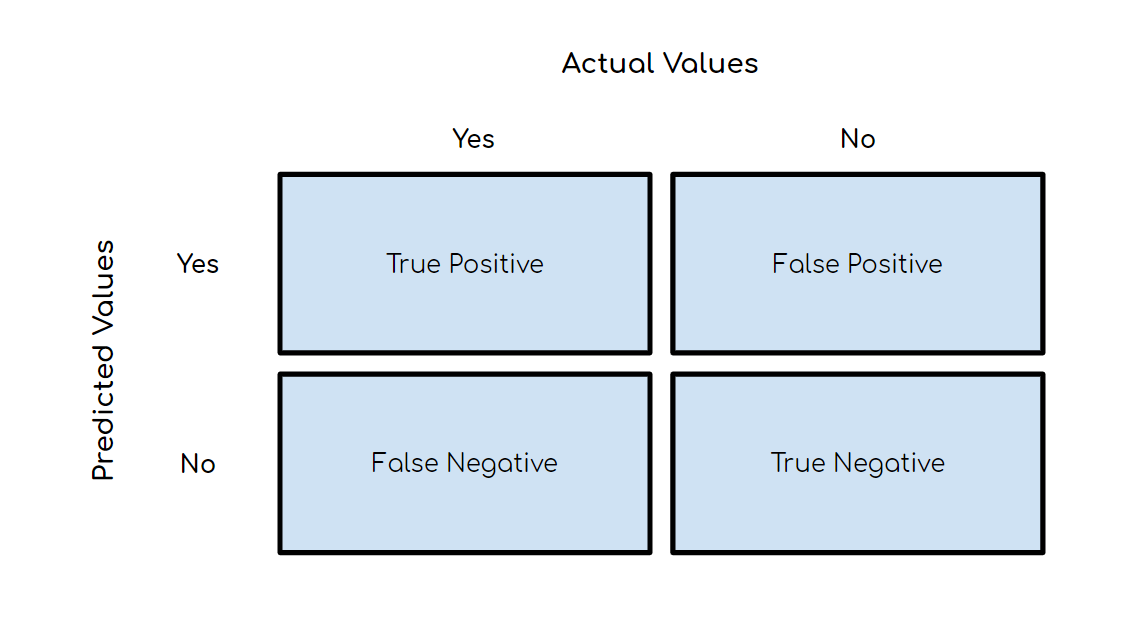

In [244]:
from sklearn.metrics import confusion_matrix

y_pred = logistic_predictions
confusion_matrix(y_test,y_pred)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,98,9,107
1,18,29,47
All,116,38,154


# Conclusion 

This is my personal work, I have achieved the tasks I assigned for myself it may not be handy or needed in the field of medicine but overall I was able to reach my goal. There may be mistakes and few guidance along the way. Here is were team work comes to share and predict if the accuracy of the outcome. 